* Course Project on EDA with Python

<h1><center> WATSAPP GROUP DATA ANALYSIS</center></h1>

In this course project, I will be extrating real world watsapp group data. After extraction will be defining a function to make the data in a readable format. Once we prepare the dataframe will be cleaning the dataset. Once the dataset is ready, I will  start with the analysis with what all I have learnt till now about exploratory data analysis.

<a><img src="image1.png" width="800" align="center"></a>

<h1><center> Let's Dive into the Project !! </center></h1>

In [1]:
project_name = "Project Watsapp Group Analysis"

In [2]:
!pip install jovian --upgrade -q

<h1><center> Data Preparation and Cleaning</center></h1>

Q.) How to obtain Whatsapp Chat data

* Open whatsapp
* Open a Group/Inbox
* Click on the 3 dotted options button
* Click on more
* Click on export chat
* Click on without media

<a><img src="KldS1n5.png" width="800" align="center"></a>

Before you can get started, ensure that the following packages are installed in your Python environment

    numpy
    pandas
    matplotlib
    seaborn
    wordcloud
    emoji
    jovian


Run the following command to get all the listed python libraries

* pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade

In [3]:
pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade

Requirement already up-to-date: numpy in /home/monish/anaconda3/lib/python3.7/site-packages (1.19.2)
Requirement already up-to-date: pandas in /home/monish/anaconda3/lib/python3.7/site-packages (1.1.2)
Requirement already up-to-date: matplotlib in /home/monish/anaconda3/lib/python3.7/site-packages (3.3.2)
Requirement already up-to-date: seaborn in /home/monish/anaconda3/lib/python3.7/site-packages (0.11.0)
Requirement already up-to-date: wordcloud in /home/monish/anaconda3/lib/python3.7/site-packages (1.8.0)
Requirement already up-to-date: emoji in /home/monish/anaconda3/lib/python3.7/site-packages (0.6.0)
Requirement already up-to-date: jovian in /home/monish/anaconda3/lib/python3.7/site-packages (0.2.19)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

In /home/monish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/monish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/monish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/monish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/monish/anaconda3/lib/python3.7/site-packages/matplo

Just like raw vegetables have to be cooked and garnished with a variety of spices to make them palatable to humans, so also this plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe:


<a><img src="food.png" width="800" align="center"></a>

In [5]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

<h1><center> Exploratory Data Analysis and Visualization</center></h1>

<a><img src="Explore.png" width="800" align="center"></a>

In [6]:
df = rawToDf('CapgeminiGroup.txt', '12hr')

In [7]:
df.head()

,date_time,user,msg
0,2020-01-08 11:51:00,grp_notif,Messages and calls are end-to-end encrypted. N...
1,2020-01-08 19:51:00,Prasad Sawant,<Media omitted>
2,2020-01-08 20:42:00,Neha Singh Cg,Hahaaaa
3,2020-01-09 09:32:00,Tushar Gangurde Cg,<Media omitted>
4,2020-01-09 12:04:00,Priyanka Ozarde Cg,<Media omitted>


In [8]:
df.shape

(24962, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24962 entries, 0 to 24961
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  24962 non-null  datetime64[ns]
 1   user       24962 non-null  object        
 2   msg        24962 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 585.2+ KB


In [10]:
df.columns

Index(['date_time', 'user', 'msg'], dtype='object')

In [11]:
df.tail()

,date_time,user,msg
24957,2020-09-27 11:20:00,Ankit Wankhade Cg,Iss bar jo bhi award Furniture wagere ka paisa...
24958,2020-09-27 11:20:00,Ankit Wankhade Cg,😂😂
24959,2020-09-27 11:27:00,Mursalin Mulani Cg,Hahahah
24960,2020-09-27 11:27:00,Mursalin Mulani Cg,True
24961,2020-09-27 14:15:00,Tushar Gangurde Cg,<Media omitted>


* Lets Clean the Unwanted data :

In [12]:
i = df[(df.msg == '<Media omitted> ')].index

In [13]:
df.drop(i,inplace=True)

In [14]:
df[(df.msg == '<Media omitted> ')]

,date_time,user,msg


In [15]:
df.shape

(22031, 3)

In [16]:
df.user.unique()

array(['grp_notif', 'Neha Singh Cg', 'Tushar Gangurde Cg',
       'Akash Sarmalkar', 'Ankit Wankhade Cg', 'Sanket Kadam Cg',
       'Prachi Patil', 'Parth Cg', 'Monish Patil', 'Priyanka Ozarde Cg',
       'Kiran Patel Cg', 'Prasad Sawant', 'Makrand Kasable Cg',
       'Kanika Bhandari Cg', 'Life Partner', 'Janice Nazerath Cg',
       'Sonam Wadhwani Cg', 'Rahul Mindhe', 'Mursalin Mulani Cg',
       'Nusrat Dance Cg', 'Meera Dance Cg', 'Hemant Kumar Cg',
       'Sayali Sawant Cg', 'Archi Vira', 'Saurav Cg dance', 'Amar Dada',
       'Poonam Cg Dance 2016', 'Anagha dance Cg', 'Raool Cg unni',
       'Shruti Murgai', 'Dimple Canada'], dtype=object)

In [17]:
i = df[(df.user == 'grp_notif')].index

In [18]:
df.drop(i,inplace=True)

In [19]:
df[(df.user == 'grp_notif')]

,date_time,user,msg


In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
df.shape

(22011, 3)

In [22]:
df.head()

,date_time,user,msg
0,2020-01-08 20:42:00,Neha Singh Cg,Hahaaaa
1,2020-01-09 12:04:00,Tushar Gangurde Cg,🤣🤣🤣
2,2020-01-09 12:06:00,Akash Sarmalkar,😂😂
3,2020-01-09 12:31:00,Ankit Wankhade Cg,Kuthala asa GRP ahe tuza.....jitha Tula yevhad...
4,2020-01-09 12:32:00,Sanket Kadam Cg,Ha hum log ko bhi add kar


In [23]:
df.describe()

/home/monish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date_time,user,msg
count,22011,22011,22011
unique,11294,30,17418
top,2020-03-24 23:53:00,Ankit Wankhade Cg,😂
freq,16,2940,237
first,2020-01-08 20:42:00,NaN,NaN
last,2020-09-27 11:27:00,NaN,NaN


<h1><center> Asking and Answering Questions </center></h1>

## Q1.) Who is the top 10 active member of the group?

In [24]:
user_value_counts = df['user'].value_counts().copy()

In [25]:
top_10_user_value_counts = user_value_counts.sort_values(ascending=False).head(10)

<AxesSubplot:>

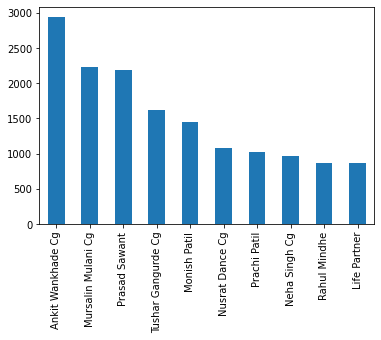

In [26]:
top_10_user_value_counts.plot.bar()

* INFERENCE - "Ankit Wankhande seems to be the most talkative and active member in the group.

## Q2.) Who is the top 10 inactive member of the group?

In [27]:
user_value_counts = df['user'].value_counts().copy()

In [28]:
top_10_user_value_counts = user_value_counts.sort_values(ascending=False).tail(10)

<AxesSubplot:>

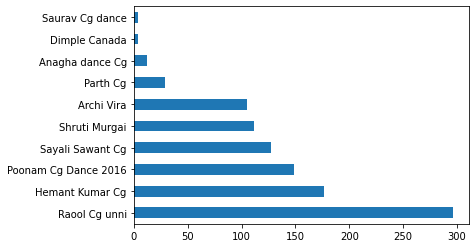

In [29]:
top_10_user_value_counts.plot.barh()

* INFERENCE - Dimple seems to be the most inactive member in the group.

## Q3.)  Count of all the emojis that a user has used?

In [30]:
me = "Monish Patil"

In [31]:
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_counter[emoji_found] += 1

In [32]:
for item in emoji_counter.most_common(10):
    print(item[0] + "->" + str(item[1]))

🤣->1078
😜->241
😅->151
❤->129
😍->125
😘->110
👍->103
😆->98
🙏->65
😛->38


* INFERENCE -> Monish Patil seems to be using the Laughing emoji the most.

## Q4.)  What can my activity say about user Monish Patils sleep cycle?


In [33]:
df.date_time=pd.to_datetime(df.date_time)

In [34]:
df['hour'] = df['date_time'].dt.hour

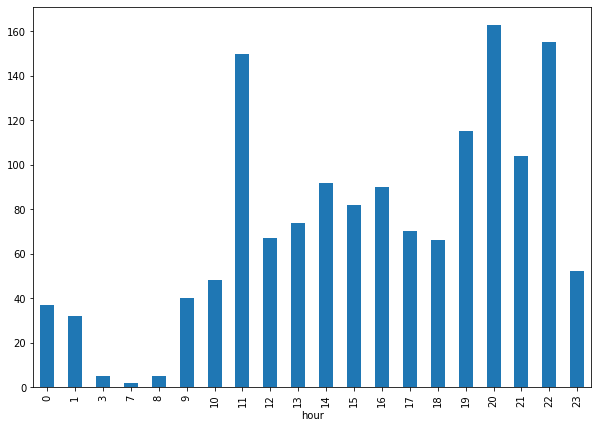

In [35]:
df[df.user=='Monish Patil'].groupby(['hour']).size().sort_index().plot.bar(figsize=(10,7));

* INFERENCE -> My Activity on watsapp shows that my Sleep cycle is from 11pm tp 10am, as the bar during that time is low.

## Q5.) How many words does a user type on average ?

In [36]:
df.head(2)

,date_time,user,msg,hour
0,2020-01-08 20:42:00,Neha Singh Cg,Hahaaaa,20
1,2020-01-09 12:04:00,Tushar Gangurde Cg,🤣🤣🤣,12


In [37]:
df['Word_Count'] = df['msg'].apply(lambda x : len(x.split()))

In [38]:
df.head(2)

,date_time,user,msg,hour,Word_Count
0,2020-01-08 20:42:00,Neha Singh Cg,Hahaaaa,20,1
1,2020-01-09 12:04:00,Tushar Gangurde Cg,🤣🤣🤣,12,1


In [39]:
df.groupby('user')['Word_Count'].sum().sort_values(ascending=False).head()

user
Ankit Wankhade Cg     19133
Tushar Gangurde Cg    13751
Prasad Sawant         12297
Mursalin Mulani Cg    11174
Rahul Mindhe           5773
Name: Word_Count, dtype: int64

In [40]:
df.groupby('user')['Word_Count'].mean().sort_values(ascending=False).head()

user
Amar Dada               14.164773
Poonam Cg Dance 2016    11.100671
Parth Cg                10.137931
Hemant Kumar Cg          9.677966
Tushar Gangurde Cg       8.525108
Name: Word_Count, dtype: float64

* INFERENCE -> Ankit seems to have sent most number of words but average wise Amar seems to have typed most number of words in a sentence.

## Q6.) Which user types the most number of letter and also the highest average number of letters in a sentence?

In [41]:
df['Letter_Count'] = df['msg'].apply(lambda s : len(s))

In [42]:
df.head(2)

,date_time,user,msg,hour,Word_Count,Letter_Count
0,2020-01-08 20:42:00,Neha Singh Cg,Hahaaaa,20,1,8
1,2020-01-09 12:04:00,Tushar Gangurde Cg,🤣🤣🤣,12,1,4


In [43]:
df.groupby('user')['Letter_Count'].sum().sort_values(ascending=False).head()

user
Ankit Wankhade Cg     110872
Tushar Gangurde Cg     76187
Mursalin Mulani Cg     66537
Prasad Sawant          64186
Prachi Patil           31305
Name: Letter_Count, dtype: int64

In [44]:
df.groupby('user')['Letter_Count'].mean().sort_values(ascending=False).head()

user
Amar Dada               84.741477
Poonam Cg Dance 2016    68.912752
Hemant Kumar Cg         55.875706
Parth Cg                52.413793
Tushar Gangurde Cg      47.233106
Name: Letter_Count, dtype: float64

* INFERENCE -> Ankit seems to have typed most number of letters in a sentence but average wise Amar seems to have typed most number of letters in a sentence.

## Q7.) Most Usage - Time of Day

In [45]:
df.shape

(22011, 6)

In [46]:
df['DayOfWeek'] = df['date_time'].apply(lambda x: x.day_name())

In [47]:
res = df.groupby(['hour', 'DayOfWeek'])['msg'].size().reset_index()
res

,hour,DayOfWeek,msg
0,0,Friday,125
1,0,Monday,181
2,0,Saturday,235
3,0,Sunday,171
4,0,Thursday,49
...,...,...,...
155,23,Saturday,197
156,23,Sunday,262
157,23,Thursday,120
158,23,Tuesday,201


In [48]:
result = res.pivot("hour", 'DayOfWeek', 'msg')
result

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,125.0,181.0,235.0,171.0,49.0,200.0,120.0
1,19.0,48.0,44.0,79.0,35.0,19.0,49.0
2,1.0,7.0,1.0,40.0,5.0,5.0,3.0
3,3.0,1.0,NaN,17.0,2.0,3.0,NaN
4,2.0,6.0,2.0,2.0,NaN,NaN,NaN
5,5.0,2.0,1.0,5.0,2.0,1.0,NaN
6,NaN,2.0,1.0,1.0,NaN,1.0,4.0
7,3.0,6.0,1.0,1.0,6.0,3.0,5.0
8,4.0,22.0,13.0,7.0,23.0,19.0,20.0


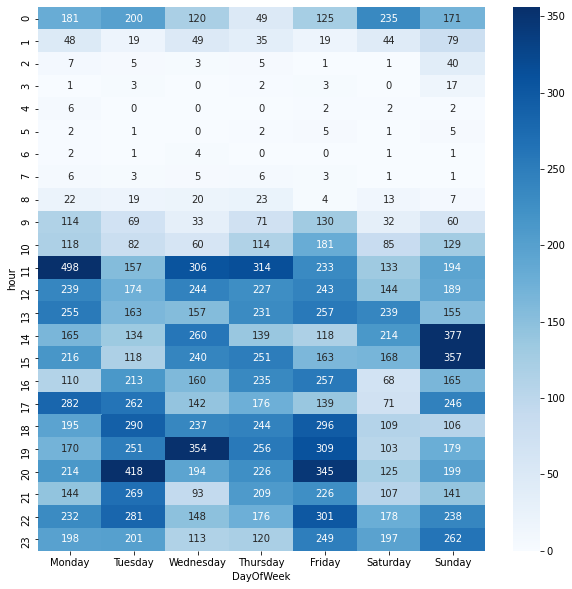

In [49]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,10))
sns.heatmap(result[days].fillna(0), robust=True, annot=True,fmt='g',cmap='Blues');

* INFERENCE -> Looks like on monday at 11am , most of the group members talk. This may be because they might be discussing about their weekdays.

# Q9.) Do I have any inclination towards responding to someone?

In [51]:
df.user.unique()

array(['Neha Singh Cg', 'Tushar Gangurde Cg', 'Akash Sarmalkar',
       'Ankit Wankhade Cg', 'Sanket Kadam Cg', 'Prachi Patil', 'Parth Cg',
       'Monish Patil', 'Priyanka Ozarde Cg', 'Kiran Patel Cg',
       'Prasad Sawant', 'Makrand Kasable Cg', 'Kanika Bhandari Cg',
       'Life Partner', 'Janice Nazerath Cg', 'Sonam Wadhwani Cg',
       'Rahul Mindhe', 'Mursalin Mulani Cg', 'Nusrat Dance Cg',
       'Meera Dance Cg', 'Hemant Kumar Cg', 'Sayali Sawant Cg',
       'Archi Vira', 'Saurav Cg dance', 'Amar Dada',
       'Poonam Cg Dance 2016', 'Anagha dance Cg', 'Raool Cg unni',
       'Shruti Murgai', 'Dimple Canada'], dtype=object)

In [52]:
df.reset_index(inplace=True, drop=True)
df.shape

(22011, 7)

In [53]:
me="Monish Patil" # user name

In [54]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[   11    22    23 ... 21994 21995 22004] (1449,)


In [55]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[   10    21    22 ... 21993 21994 22003] (1449,)


In [56]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(1449, 7)

In [57]:
i = df_replies[df_replies.user==me].index

In [58]:
df_replies.drop(i,inplace=True)

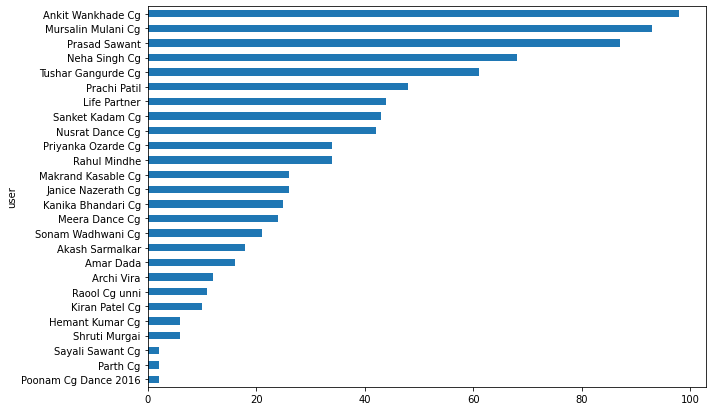

In [59]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh',figsize=(10,7));

* Inference -> User Monish Seems to be replying the most number of times to Ankit.

## Q10.) Which are the most common words? Create WordCloud!!!

In [60]:
comment_words = ' '
stopwords = STOPWORDS.update(['yeah', 'alli', 'ide', 'okay', 'ok', 'will','thi','ko','pe','ke','jo','ur','ki',
                             'aur','ab','nai','hai','kal','pie','wa','ne','sala'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

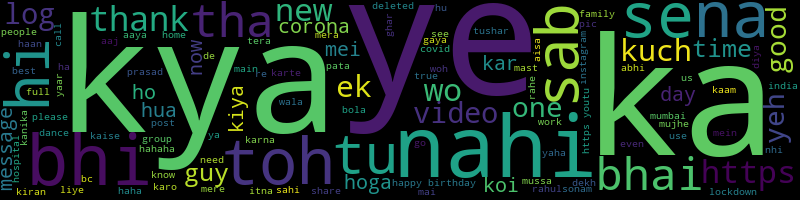

In [61]:
wordcloud.to_image()

In [63]:
jovian.commit(project="Project Watsapp Group Analysis")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monipati42013/project-watsapp-group-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/monipati42013/project-watsapp-group-analysis


'https://jovian.ml/monipati42013/project-watsapp-group-analysis'